1. Make sure that b-splines are correct
    x. Check the code for obvious errors
    2. Write energy function that works with b-splines
    3. Check if the TPF and B-spline energies are the same
2. Write LinReg optimization function
3. Fit energy to an existing potential (e.g., Marinica)
4. Write Backfitting optimization function
5. Optimize stat. distance

In [52]:
%matplotlib inline
import os
import sys
import re
import numpy as np
import pickle
from scipy.optimize import fmin
import multiprocessing as mp
import functools
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# statmech library setup
sys.path.append('../../statmechlib')
from statmechlib.preprocessing import select_nodes, to_param_dict, to_param_list, tpf_to_bsplines
from statmechlib.preprocessing import Trajectory, scale_configuration, pair_dist_cutoff, find_index
from statmechlib.read_write import params_to_pickle

In [4]:
working = '../data/working'

In [5]:
stats_file = 'stats_bs_samples' # 'stats_samples'

In [6]:
with open(os.path.join(working, stats_file+'.pickle'), 'rb') as fi:
    stats_tpf = pickle.load(fi)

In [7]:
print(stats_tpf['hyperparams'])

{u'pair': [1.05, 1.1499999999999999, 1.25, 1.3500000000000001, 1.45, 1.55, 1.6499999999999999, 1.75, 1.8500000000000001, 1.95, 2.0499999999999998, 2.1499999999999999, 2.25, 2.3500000000000001, 2.4500000000000002, 2.5499999999999998, 2.6499999999999999, 2.75, 2.8500000000000001, 2.9500000000000002, 3.0499999999999998, 3.1499999999999999, 3.25, 3.3500000000000001, 3.4500000000000002, 3.5499999999999998, 3.6499999999999999, 3.75, 3.8500000000000001, 3.9500000000000002, 4.0499999999999998, 4.1500000000000004, 4.25, 4.3499999999999996, 4.4500000000000002, 4.5499999999999998, 4.6500000000000004, 4.75, 4.8499999999999996, 4.9500000000000002, 5.0499999999999998, 5.1500000000000004, 5.25, 5.3499999999999996, 5.4500000000000002, 5.5499999999999998, 5.6500000000000004, 5.75, 5.8499999999999996, 5.9500000000000002], u'edens': [1.05, 1.1499999999999999, 1.25, 1.3500000000000001, 1.45, 1.55, 1.6499999999999999, 1.75, 1.8500000000000001, 1.95, 2.0499999999999998, 2.1499999999999999, 2.25, 2.350000000

In [12]:
print(tpf_to_bsplines.__doc__)


    Convert statistics data from the cubic truncated power function (TPF) basis to b-splines.
    Only works for the special case of evenly separated knots. 

    Parameters
    ----------
    stats_tpf: dict
               Trajectory statistics information using TPF basis
               Should be based on evenly spaced knots with the last three
               being the boundary knots

    Returns
    -------
    stats_bspline: dict
               Trajectory statistics information using b-spline basis

    


In [13]:
stats_tpf.keys()

[u'function',
 'bcc_npt_langevin_3700K',
 'vac_npt_langevin_2000K',
 'inf',
 'relax',
 'screw_111_npt_langevin_2000K',
 u'hyperparams',
 'bcc_npt_langevin_300K',
 'eos_bcc',
 'eos',
 'fcc_npt_langevin_300K',
 'vacint',
 'eos_fcc',
 'i110_npt_langevin_2000K',
 'liq_3700K',
 'liq_5000K',
 'i111_npt_langevin_2000K',
 'bain']

In [73]:
stats_bspline = tpf_to_bsplines(stats_tpf)

len 50


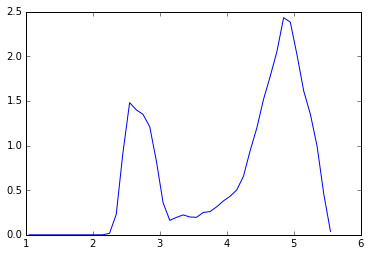

In [76]:
plt.plot(stats_bspline['hyperparams']['pair'][:], stats_bspline['fcc_npt_langevin_300K']['energy'][0][2])

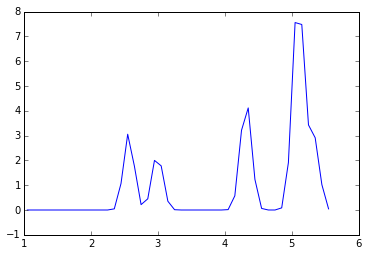

In [77]:
plt.plot(stats_bspline['hyperparams']['pair'][:], stats_bspline['bcc_npt_langevin_300K']['energy'][0][2])

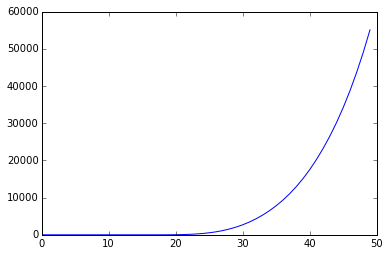

In [54]:
plt.plot(stats_tpf['relax']['energy'][0][2])

In [69]:
len(stats_bspline['hyperparams']['pair'][:-5]), len(stats_bspline['hyperparams']['pair'])

(45, 50)